<a href="https://colab.research.google.com/github/Manasi758/TCS-iON--HR-Salary-Dashboard-Train-the-dataset-and-predict-the-salary/blob/main/Interim_report_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

LOADING THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/salarydata.csv')
     

In [ ]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
data.shape


(32561, 14)

In [ ]:
data.isna().sum()


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no significance in salary prediction. so we can drop it. The column,education-num is the numerical version of the column education, so we also drop it.



In [ ]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


**Exploratory data analysis**

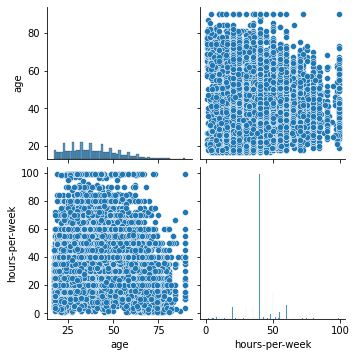

In [ ]:
sns.pairplot(data)


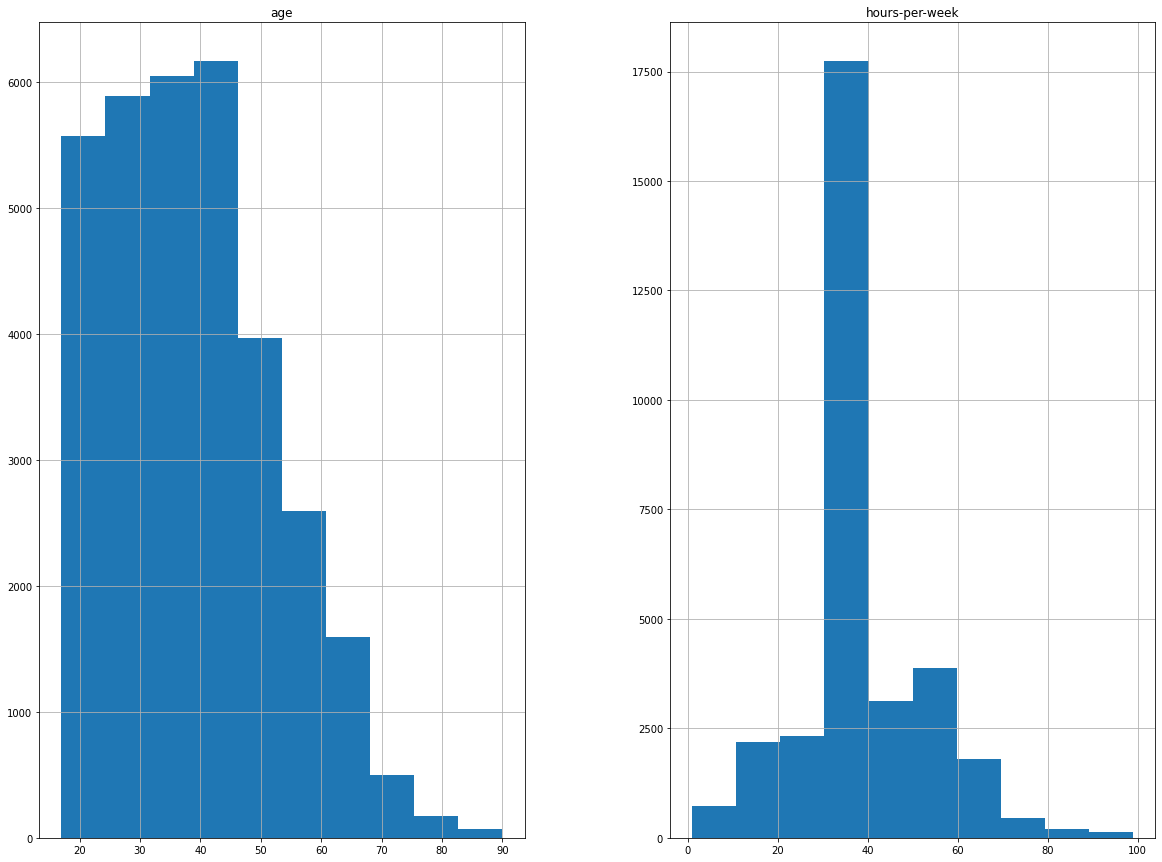

In [ ]:

data.hist(figsize=(20,15))
plt.show()

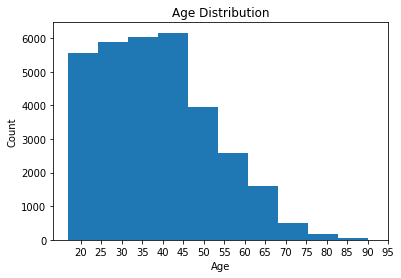

In [ ]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

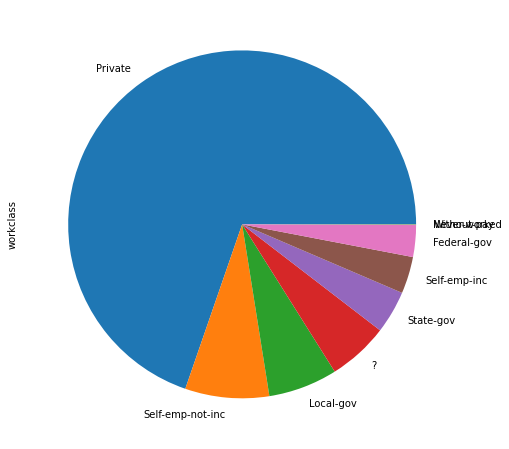

In [ ]:
#checking workclass

data['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()
     


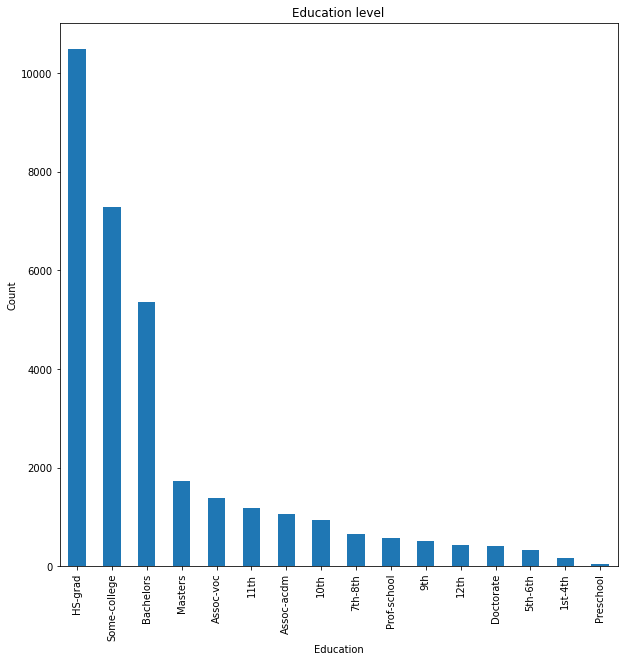

In [ ]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()
     


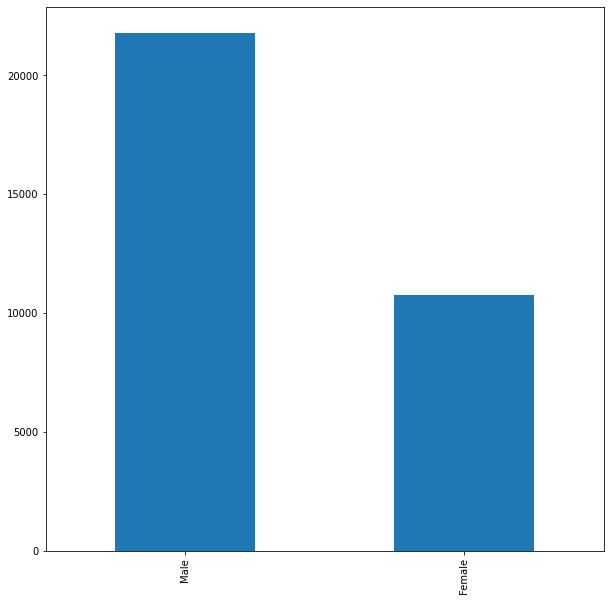

In [ ]:
#checking sex

data['sex'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

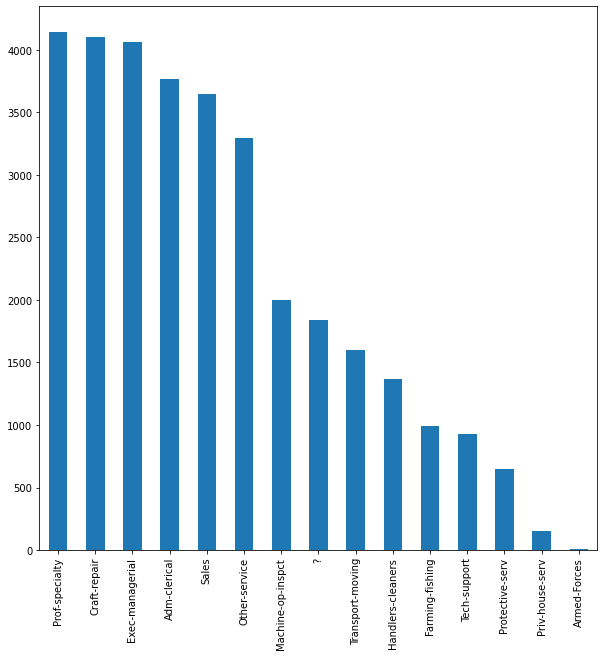

In [ ]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

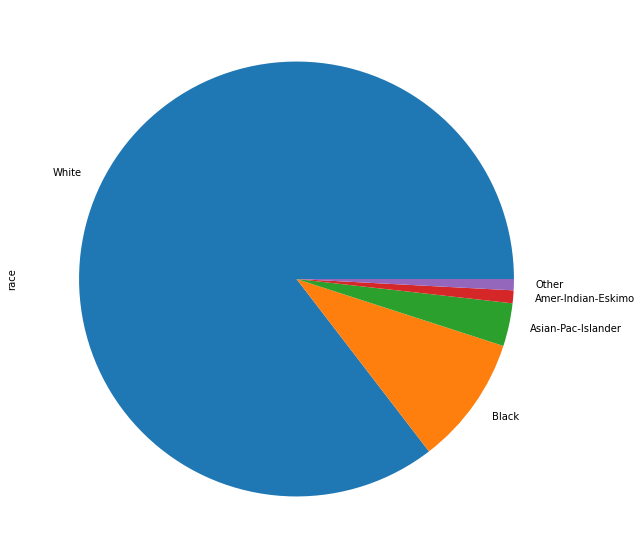

In [ ]:

#Checking race

data['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

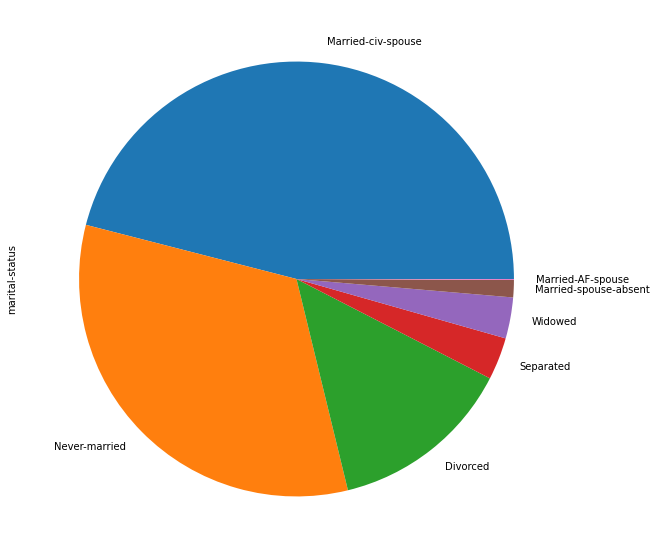

In [ ]:
#checking marital-status

data['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

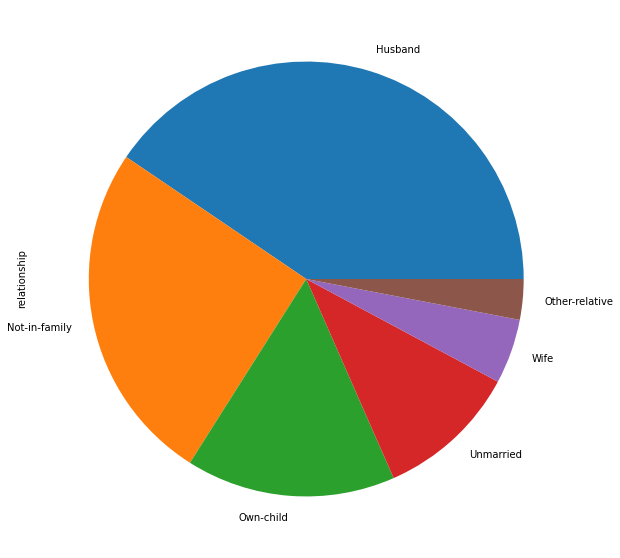

In [ ]:

#checking relationship

data['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

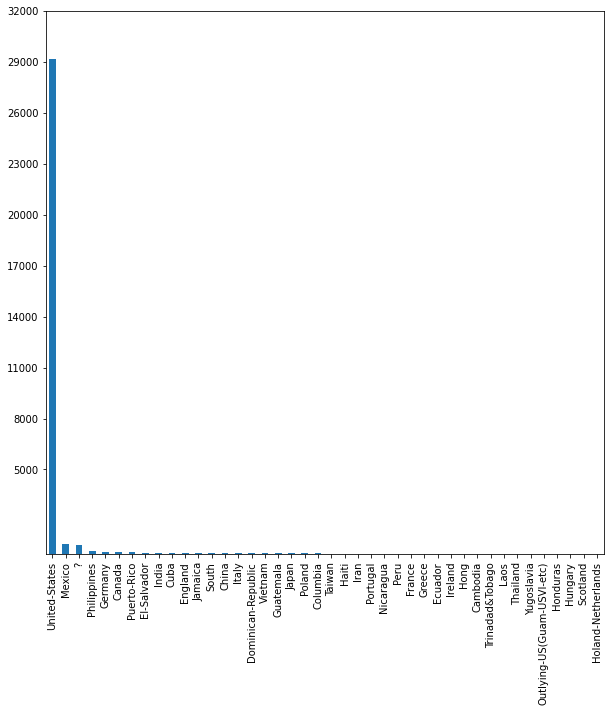

In [ ]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

In [ ]:

# Found '?' in columns occupation, workclass, and native-country
data['workclass'].mode()

0    Private
dtype: object

In [ ]:
data['occupation'].mode()

0    Prof-specialty
dtype: object

In [ ]:
data['native-country'].mode()

0    United-States
dtype: object

In [ ]:

data['workclass'] = data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')

In [ ]:

data[data['salary']=='?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


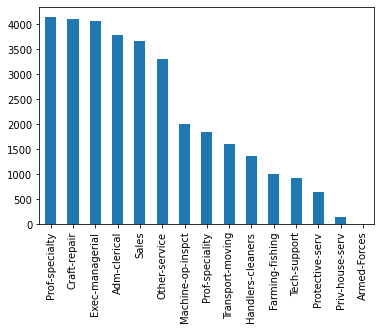

In [ ]:

#checking whether the records that contains
#the question mark '?' have being removed

#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

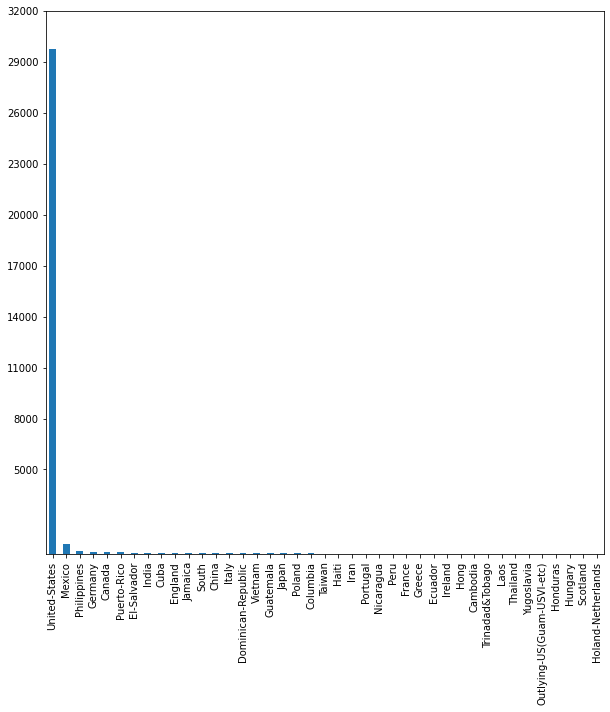

In [ ]:

#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

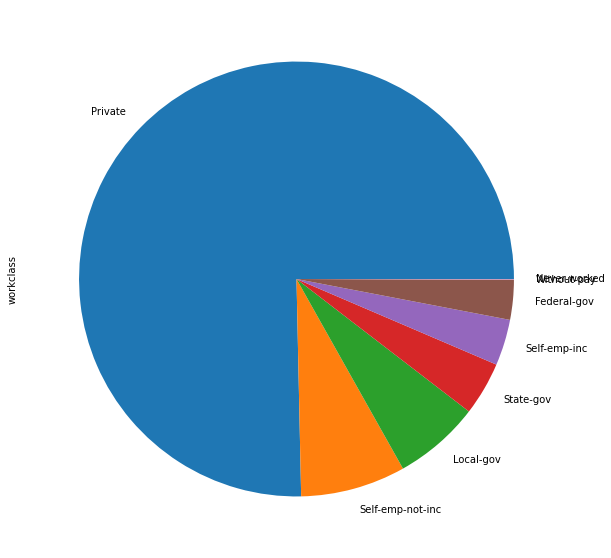

In [ ]:
#checking workclass

data['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

OUTLIER HANDLING



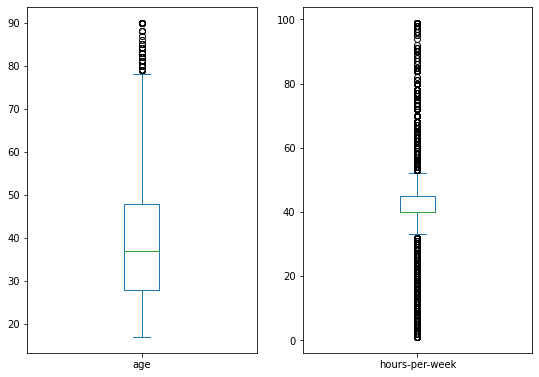

In [ ]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(14,14));

From the figure it is clear that age and hours-per-week have outliers. So we should remove it.

In [ ]:
##Outlier handling of age and hours-per-week##

Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

outlier=[]

for x in data['age']:
 if((x>up_limit) or (x<low_limit)):
   outlier.append(x)
indA=data['age']>up_limit
indA1=data.loc[indA].index
data.drop(indA1,inplace=True)
indB=data['age']<low_limit
indB1=data.loc[indB].index
data.drop(indB1,inplace=True)
Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR



for x in data['hours-per-week']:
 if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['hours-per-week']>up_limit
indA1=data.loc[indA].index

data.drop(indA1,inplace=True)

indB=data['hours-per-week']<low_limit
indB1=data.loc[indB].index

data.drop(indB1,inplace=True)


<ipython-input-15-7b2519d3bcad>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['age'],25,interpolation='midpoint')
<ipython-input-15-7b2519d3bcad>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['age'],50,interpolation='midpoint')
<ipython-input-15-7b2519d3bcad>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['age

Text(0.5, 1.0, 'Box plot of age after removal of outlier')

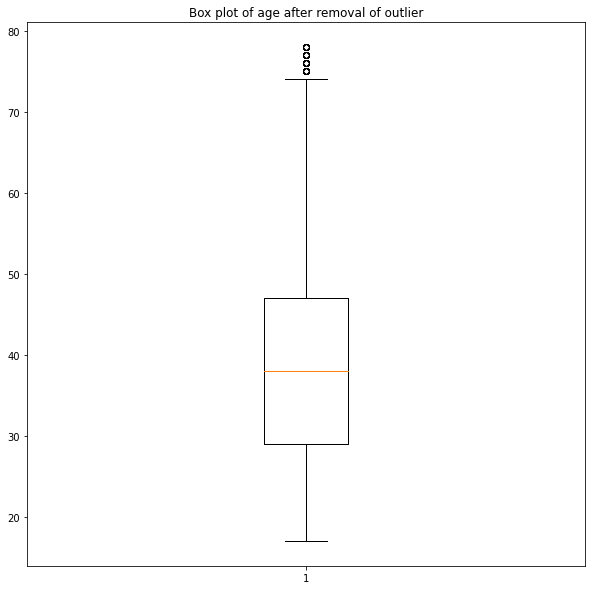

In [ ]:
plt.boxplot(data['age'])
plt.title('Box plot of age after removal of outlier')
     

Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

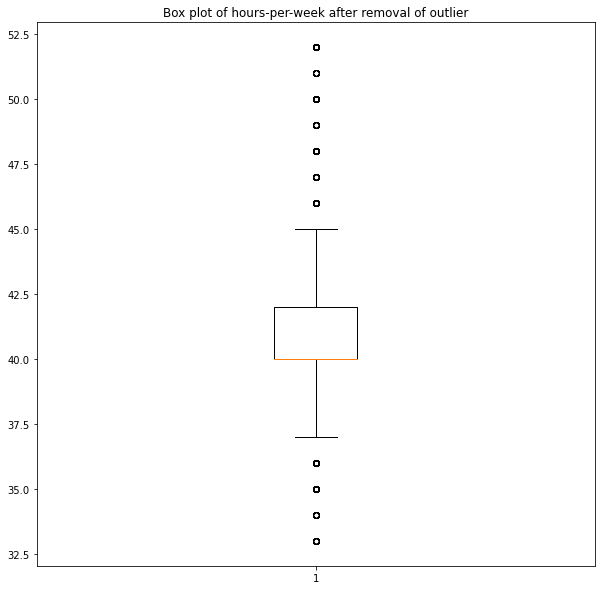

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of hours-per-week after removal of outlier')

In [ ]:
data.shape


(23499, 11)

Outliers are handled and shape reduced from (32561,14) to (23499,11).

LABEL ENCODING

In [ ]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
data['workclass']=label.fit_transform(data['workclass'])
data['education']=label.fit_transform(data['education'])
data['occupation']=label.fit_transform(data['occupation'])
data['sex']=label.fit_transform(data['sex'])
data['salary']=label.fit_transform(data['salary'])
data['race']=label.fit_transform(data['race'])
data['native-country']=label.fit_transform(data['native-country'])
data['marital-status']=label.fit_transform(data['marital-status'])
data['relationship']=label.fit_transform(data['relationship'])
     

data
     

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,4,0,1,4,1,40,38,0
2,38,3,11,0,5,1,4,1,40,38,0
3,53,3,1,2,5,0,2,1,40,38,0
4,28,3,9,2,10,5,2,0,40,4,0
5,37,3,12,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,15,4,11,1,4,1,40,38,0
32556,27,3,7,2,13,5,4,0,38,38,0
32557,40,3,11,2,6,0,4,1,40,38,1
32558,58,3,11,6,0,4,4,0,40,38,0


e.Standardization

In [ ]:

x=data.drop(columns=['salary'],axis=1)
y=data['salary']
x.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,4,0,1,4,1,40,38
2,38,3,11,0,5,1,4,1,40,38
3,53,3,1,2,5,0,2,1,40,38
4,28,3,9,2,10,5,2,0,40,4
5,37,3,12,2,3,5,4,0,40,38


In [ ]:
#Standard Scaler
from sklearn.model_selection import train_test_split
#train=70
#test=30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

     

(16449, 10) (7050, 10) (16449,) (7050,)


In [ ]:


from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.02129829,  2.65135489, -0.36291919, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [-0.06073556, -0.02804943,  0.17988309, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [ 1.16977222, -0.02804943, -2.53412829, ...,  0.67403711,
        -0.39054377,  0.26699709],
       ...,
       [ 0.10333214, -0.02804943,  0.17988309, ...,  0.67403711,
        -0.39054377,  0.26699709],
       [ 1.57994149, -0.02804943,  0.17988309, ..., -1.48359783,
        -0.39054377,  0.26699709],
       [ 1.08773837,  0.86508535,  0.17988309, ..., -1.48359783,
        -0.39054377,  0.26699709]])

**Modelling**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

**LOGISTIC REGRESSION**

In [ ]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
con_lr=confusion_matrix(y_test,pred1)
print("The confusion matrix of logistic regression is \n",con_lr)
ac_lr=accuracy_score(y_test,pred1)
print('Accuracy:',ac_lr*100)

The confusion matrix of logistic regression is 
 [[4885  289]
 [1482  394]]
Accuracy: 74.87943262411348


In [ ]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      5174
           1       0.58      0.21      0.31      1876

    accuracy                           0.75      7050
   macro avg       0.67      0.58      0.58      7050
weighted avg       0.72      0.75      0.70      7050

